In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from flask import Flask, render_template, send_from_directory ## sendfromdirectory untuk link gambar





In [2]:
df = pd.read_excel(
'asia index2.xlsx',
    header =1,
)

df = df.rename(columns={'Unnamed: 0':'Date'})
# print(type(df['Date']))
df



,Date,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,2014-01-02,4327.265,1261.71,1852.95,5984.26,3174.65,833.29,504.51
1,2014-01-03,4257.663,1251.31,1834.74,5947.93,3131.47,829.89,505.37
2,2014-01-06,4202.809,1258.66,1829.18,5985.81,3123.82,837.68,509.10
3,2014-01-07,4175.806,1258.66,1825.11,5947.44,3120.88,861.63,510.12
4,2014-01-08,4200.593,1266.25,1831.30,5986.48,3150.65,859.35,513.90
5,2014-01-09,4201.218,1266.25,1828.21,5937.51,3145.41,860.00,516.98
6,2014-01-10,4254.971,1263.34,1826.61,5842.88,3143.87,858.25,518.94
7,2014-01-13,4390.771,1263.34,1834.97,5940.67,3135.49,880.70,521.11
8,2014-01-15,4441.594,1245.36,1824.03,5958.12,3143.25,871.02,526.68
9,2014-01-16,4412.489,1245.36,1813.01,5982.24,3140.44,888.02,533.54


In [3]:
df.isnull().sum()

Date             0
Indonesia      133
Laos           136
Malaysia       139
Philippines    167
Singapore      100
Thailand       172
Vietnam        128
dtype: int64

In [4]:
df = df.fillna(method='ffill')
# df = df.dropna()
df.isnull().sum()
df

,Date,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,2014-01-02,4327.265,1261.71,1852.95,5984.26,3174.65,833.29,504.51
1,2014-01-03,4257.663,1251.31,1834.74,5947.93,3131.47,829.89,505.37
2,2014-01-06,4202.809,1258.66,1829.18,5985.81,3123.82,837.68,509.10
3,2014-01-07,4175.806,1258.66,1825.11,5947.44,3120.88,861.63,510.12
4,2014-01-08,4200.593,1266.25,1831.30,5986.48,3150.65,859.35,513.90
5,2014-01-09,4201.218,1266.25,1828.21,5937.51,3145.41,860.00,516.98
6,2014-01-10,4254.971,1263.34,1826.61,5842.88,3143.87,858.25,518.94
7,2014-01-13,4390.771,1263.34,1834.97,5940.67,3135.49,880.70,521.11
8,2014-01-15,4441.594,1245.36,1824.03,5958.12,3143.25,871.02,526.68
9,2014-01-16,4412.489,1245.36,1813.01,5982.24,3140.44,888.02,533.54


In [5]:
stat = df.describe()
stat

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.00000
mean,5536.136718,1063.564384,1728.011381,7516.936692,3169.920498,1021.312320,769.91732
std,637.137830,222.354872,85.417807,555.238089,217.540822,93.383757,186.45646
min,4120.503000,642.950000,1532.140000,5842.880000,2532.700000,761.750000,504.51000
25%,4986.962500,873.535000,1661.800000,7146.330000,3045.862500,950.375000,590.72000
50%,5520.982500,1027.230000,1718.265000,7581.790000,3212.100000,1028.055000,714.81500
75%,6076.733500,1249.860000,1799.170000,7906.707500,3321.787500,1091.550000,962.86250
max,6689.287000,1566.920000,1895.180000,9058.620000,3615.280000,1206.310000,1204.33000


In [6]:
df2 = pd.read_excel(
'kursasean2.xlsx'
)



df2.isnull().sum()


Date            0
Indonesia      80
Laos           80
Malaysia       80
Philippines    80
Singapore      82
Thailand       81
Vietnam        80
dtype: int64

In [7]:
df2 = df2.fillna(method='ffill')
df2.isnull().sum()
df2

,Date,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,2014-01-02,12150.0,8000.00,3.2850,44.470,1.2672,32.95,21060.0
1,2014-01-03,12160.0,8021.00,3.2850,44.690,1.2670,32.99,21075.0
2,2014-01-06,12170.0,8021.00,3.2835,44.540,1.2677,33.05,21080.0
3,2014-01-07,12230.0,8003.00,3.2830,44.800,1.2710,33.05,21075.0
4,2014-01-08,12225.0,8018.00,3.2710,44.680,1.2730,33.03,21080.0
5,2014-01-09,12185.0,8015.00,3.2750,44.600,1.2704,32.99,21075.0
6,2014-01-10,12155.0,8013.00,3.2680,44.550,1.2635,32.96,21072.0
7,2014-01-13,12045.0,8009.00,3.2600,44.590,1.2646,32.95,21060.0
8,2014-01-15,12080.0,7991.00,3.2860,45.100,1.2726,32.85,21070.0
9,2014-01-16,12115.0,8005.00,3.2960,45.130,1.2713,32.74,21080.0


## Coverting all index to USD

In [8]:
dfkali = df.loc[0:, 'Indonesia':]
df2kali = df2.loc[0:, 'Indonesia':]
dfgab = dfkali / df2kali
dfgab


,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.356153,0.157714,564.063927,134.568473,2505.247790,25.289530,0.023956
1,0.350137,0.156004,558.520548,133.093086,2471.562747,25.155805,0.023980
2,0.345342,0.156921,557.082382,134.391783,2464.163446,25.345840,0.024151
3,0.341440,0.157274,555.927505,132.755357,2455.452400,26.070499,0.024205
4,0.343607,0.157926,559.859370,133.985676,2474.980361,26.017257,0.024379
5,0.344786,0.157985,558.232061,133.128027,2475.920970,26.068506,0.024530
6,0.350059,0.157661,558.938188,131.153311,2488.223190,26.039138,0.024627
7,0.364531,0.157740,562.874233,133.228751,2479.432232,26.728376,0.024744
8,0.367682,0.155845,555.091296,132.109091,2469.943423,26.515068,0.024997
9,0.364217,0.155573,550.063714,132.555728,2470.258790,27.123396,0.025310


## Converted index



In [9]:
statgab = dfgab.describe()


statgab.to_html('statgab.html')
statgab

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,0.411632,0.129223,439.357734,153.864063,2346.171609,30.980251,0.034110
std,0.039186,0.029958,61.952657,11.252241,207.806511,4.043060,0.007432
min,0.280402,0.072753,359.811490,127.020459,1769.015855,21.007998,0.023323
25%,0.394225,0.103203,396.458834,146.264201,2200.957882,27.687253,0.027414
50%,0.418876,0.124443,414.359202,153.775653,2368.746064,31.648335,0.031391
75%,0.439127,0.154722,472.444102,161.341715,2505.355147,34.380754,0.041554
max,0.500573,0.193566,597.050473,182.353152,2761.469013,38.577231,0.052845


## Every year is one period so I split the data per year to get one period. 

In [10]:
df['Indonesia'][df['Date']=='2019-01-02']
# df['Indonesia'][824]

1314    6181.175
Name: Indonesia, dtype: float64

In [11]:
penguranganp1 = dfgab.loc[len(df)-1,'Indonesia':'Vietnam'] - dfgab.loc[1314,'Indonesia':'Vietnam']
penguranganp1 
return2019 = penguranganp1 / dfgab.loc[1314,'Indonesia':'Vietnam']
return2019

Indonesia      0.057587
Laos          -0.161811
Malaysia      -0.024240
Philippines    0.076829
Singapore      0.074318
Thailand       0.099919
Vietnam        0.083810
dtype: float64

In [12]:
## finding the index of the first year and the end year.
first2018 = df['Indonesia'][df['Date']=='2018-01-02'].index[0]
end2018 = df['Indonesia'][df['Date']=='2018-12-30'].index[0]
first2018
penguranganp2 = dfgab.loc[end2018,'Indonesia':'Vietnam'] - dfgab.loc[first2018,'Indonesia':'Vietnam']
penguranganp2 
return2018 = penguranganp2 / dfgab.loc[first2018,'Indonesia':'Vietnam']
return2018


Indonesia     -0.092654
Laos          -0.180116
Malaysia      -0.081029
Philippines   -0.172591
Singapore     -0.134041
Thailand      -0.082874
Vietnam       -0.122608
dtype: float64

In [13]:
## finding the index of the first year and the end year.
first2017 = df['Indonesia'][df['Date']=='2017-01-02'].index[0]
end2017 = df['Indonesia'][df['Date']=='2017-12-30'].index[0]
first2017
penguranganp2 = dfgab.loc[end2017,'Indonesia':'Vietnam'] - dfgab.loc[first2017,'Indonesia':'Vietnam']
penguranganp2 
return2017 = penguranganp2 / dfgab.loc[first2017,'Indonesia':'Vietnam']
return2017

Indonesia      0.188445
Laos          -0.039766
Malaysia       0.204147
Philippines    0.242052
Singapore      0.291558
Thailand       0.293976
Vietnam        0.502310
dtype: float64

In [14]:
## finding the index of the first year and the end year.
first2016 = df['Indonesia'][df['Date']=='2016-01-02'].index[0]
end2016 = df['Indonesia'][df['Date']=='2016-12-30'].index[0]
first2016
penguranganp2 = dfgab.loc[end2016,'Indonesia':'Vietnam'] - dfgab.loc[first2016,'Indonesia':'Vietnam']
penguranganp2 
return2016 = penguranganp2 / dfgab.loc[first2016,'Indonesia':'Vietnam']
return2016

Indonesia      0.179752
Laos          -0.138506
Malaysia      -0.072851
Philippines   -0.069021
Singapore     -0.024953
Thailand       0.193904
Vietnam        0.129073
dtype: float64

In [15]:
## finding the index of the first year and the end year.
first2015 = df['Indonesia'][df['Date']=='2015-01-02'].index[0]
end2015 = df['Indonesia'][df['Date']=='2015-12-30'].index[0]
first2015
penguranganp2 = dfgab.loc[end2015,'Indonesia':'Vietnam'] - dfgab.loc[first2015,'Indonesia':'Vietnam']
penguranganp2 
return2015 = penguranganp2 / dfgab.loc[first2015,'Indonesia':'Vietnam']
return2015

Indonesia     -0.203086
Laos          -0.178347
Malaysia      -0.208158
Philippines   -0.080961
Singapore     -0.194288
Thailand      -0.257551
Vietnam        0.012880
dtype: float64

In [16]:
# finding the index of the first year and the end year.
first2014 = df['Indonesia'][df['Date']=='2014-01-02'].index[0]
end2014 = df['Indonesia'][df['Date']=='2014-12-30'].index[0]
first2014
penguranganp2 = dfgab.loc[end2014,'Indonesia':'Vietnam'] - dfgab.loc[first2014,'Indonesia':'Vietnam']
penguranganp2 
return2014 = penguranganp2 / dfgab.loc[first2014,'Indonesia':'Vietnam']
return2014


Indonesia      0.179277
Laos           0.104475
Malaysia      -0.104283
Philippines    0.201241
Singapore      0.016895
Thailand       0.204931
Vietnam        0.049581
dtype: float64

In [17]:
result = pd.concat([return2014, return2015, return2016, return2017, return2018, return2019], axis=1, sort=False)
result

,0,1,2,3,4,5
Indonesia,0.179277,-0.203086,0.179752,0.188445,-0.092654,0.057587
Laos,0.104475,-0.178347,-0.138506,-0.039766,-0.180116,-0.161811
Malaysia,-0.104283,-0.208158,-0.072851,0.204147,-0.081029,-0.024240
Philippines,0.201241,-0.080961,-0.069021,0.242052,-0.172591,0.076829
Singapore,0.016895,-0.194288,-0.024953,0.291558,-0.134041,0.074318
Thailand,0.204931,-0.257551,0.193904,0.293976,-0.082874,0.099919
Vietnam,0.049581,0.012880,0.129073,0.502310,-0.122608,0.083810


In [18]:
result = result.T
result


,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.179277,0.104475,-0.104283,0.201241,0.016895,0.204931,0.049581
1,-0.203086,-0.178347,-0.208158,-0.080961,-0.194288,-0.257551,0.012880
2,0.179752,-0.138506,-0.072851,-0.069021,-0.024953,0.193904,0.129073
3,0.188445,-0.039766,0.204147,0.242052,0.291558,0.293976,0.502310
4,-0.092654,-0.180116,-0.081029,-0.172591,-0.134041,-0.082874,-0.122608
5,0.057587,-0.161811,-0.024240,0.076829,0.074318,0.099919,0.083810


In [19]:
## Calculating mean to be inputed to sharpe ratio formula
meanresultreturngab = result.mean(axis = 0)

colmeanresultreturngab = meanresultreturngab.index
valuesmeanresultreturngab = meanresultreturngab.values

dfmeanresultreturngab = pd.DataFrame({'countries': colmeanresultreturngab, 'converted index mean periodic return': valuesmeanresultreturngab })

dfmeanresultreturngab


,countries,converted index mean periodic return
0,Indonesia,0.051553
1,Laos,-0.099012
2,Malaysia,-0.047736
3,Philippines,0.032925
4,Singapore,0.004915
5,Thailand,0.075384
6,Vietnam,0.109174


In [20]:
dfmeanresultreturngabsorted = dfmeanresultreturngab.sort_values(['converted index mean periodic return'], ascending=False)
dfmeanresultreturngabsorted = dfmeanresultreturngabsorted.set_index(np.arange(1,len(dfmeanresultreturngabsorted)+1))
dfmeanresultreturngabsorted
dfmeanresultreturngabsorted = dfmeanresultreturngabsorted.set_index('countries')
dfmeanresultreturngabsorted



,converted index mean periodic return
countries,
Vietnam,0.109174
Thailand,0.075384
Indonesia,0.051553
Philippines,0.032925
Singapore,0.004915
Malaysia,-0.047736
Laos,-0.099012


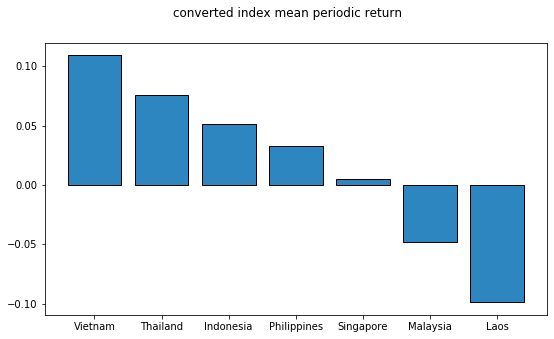

In [21]:
plt.figure('converted index mpr', figsize =(9,5))
plt.bar(dfmeanresultreturngabsorted.index, dfmeanresultreturngabsorted['converted index mean periodic return'], color= '#2E86C1', edgecolor='black', 
        linewidth=1)

plt.suptitle('converted index mean periodic return')
plt.savefig('conindexreturn.png')



<img src="img/describing sharpe ratio.png" />


<img src="img/sharpe ratio.png" />


In [22]:
## Return premium = excess return 

In [23]:
## riskfree of United States, 1 year Treasury Yield Curve Rates in the latest 2019.
riskfree = 0.0153
# https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2019

In [24]:
## risk premium per year
riskpremium = result - riskfree
riskpremium



,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.163977,0.089175,-0.119583,0.185941,0.001595,0.189631,0.034281
1,-0.218386,-0.193647,-0.223458,-0.096261,-0.209588,-0.272851,-0.002420
2,0.164452,-0.153806,-0.088151,-0.084321,-0.040253,0.178604,0.113773
3,0.173145,-0.055066,0.188847,0.226752,0.276258,0.278676,0.487010
4,-0.107954,-0.195416,-0.096329,-0.187891,-0.149341,-0.098174,-0.137908
5,0.042287,-0.177111,-0.039540,0.061529,0.059018,0.084619,0.068510


In [25]:
stdindo = np.std(riskpremium['Indonesia'])
stdindo

0.15119564894801749

In [26]:
stdlaos = np.std(riskpremium['Laos'])
stdlaos

0.10270686775146952

In [27]:
stdmalaysia = np.std(riskpremium['Malaysia'])
stdmalaysia

0.1256111529928976

In [28]:
stdphilippines = np.std(riskpremium['Philippines'])
stdphilippines

0.15252982775039786

In [29]:
stdsingapore = np.std(riskpremium['Singapore'])
stdsingapore

0.1565284777846949

In [30]:
stdthailand = np.std(riskpremium['Thailand'])
stdthailand

0.18934332061473624

In [31]:
stdvietnam = np.std(riskpremium['Vietnam'])
stdvietnam

0.19241522168731556

In [32]:
negara = df.columns.tolist()[1:]
negara

['Indonesia',
 'Laos',
 'Malaysia',
 'Philippines',
 'Singapore',
 'Thailand',
 'Vietnam']

In [33]:
dfstdgab = pd.DataFrame({'countries': negara, 'standard deviation': [stdindo, stdlaos, stdmalaysia, stdphilippines, stdsingapore, stdthailand, stdvietnam]})
    
dfstdgab


,countries,standard deviation
0,Indonesia,0.151196
1,Laos,0.102707
2,Malaysia,0.125611
3,Philippines,0.152530
4,Singapore,0.156528
5,Thailand,0.189343
6,Vietnam,0.192415


In [34]:
dfstdgabsorted = dfstdgab.sort_values(['standard deviation'], ascending=False)
dfstdgabsorted = dfstdgabsorted.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfstdgabsorted
dfstdgabsorted = dfstdgabsorted.set_index('countries')
dfstdgabsorted


# dfstdgabsorted['standard deviation']['Vietnam']


,standard deviation
countries,
Vietnam,0.192415
Thailand,0.189343
Singapore,0.156528
Philippines,0.152530
Indonesia,0.151196
Malaysia,0.125611
Laos,0.102707


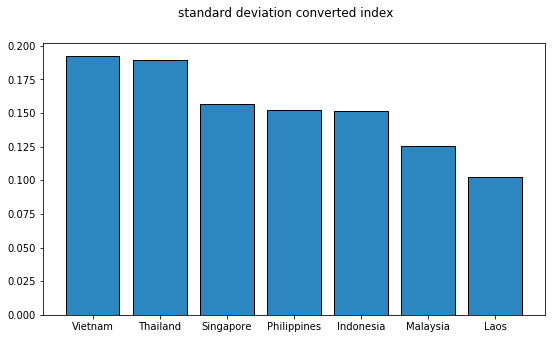

In [35]:
plt.figure('std', figsize =(9,5))
plt.bar(dfstdgabsorted.index, dfstdgabsorted['standard deviation'], color= '#2E86C1', edgecolor='black', 
        linewidth=1)

plt.suptitle('standard deviation converted index')
plt.savefig('constd.png')



## Riskpremium or excess return = Mean Return Porto - Risfree

In [36]:
excessmeanci = (dfmeanresultreturngabsorted- riskfree) #/ dfstdkurssorted['std kurs excess return']

excessmeanci

# dfmeanresultreturngabsorted




,converted index mean periodic return
countries,
Vietnam,0.093874
Thailand,0.060084
Indonesia,0.036253
Philippines,0.017625
Singapore,-0.010385
Malaysia,-0.063036
Laos,-0.114312


In [37]:
negara = excessmeanci.index
sharpe = []




for i in negara:
    sharperatioappend = excessmeanci['converted index mean periodic return'][i] / dfstdgabsorted['standard deviation'][i]
    sharpe.append(sharperatioappend)
sharpe

# excessmeanci['converted index mean periodic return']['Thailand']

[0.4878736662007606,
 0.31732973258350544,
 0.2397786121875366,
 0.1155486322502331,
 -0.06634668127316184,
 -0.5018311258024586,
 -1.1129913191551966]

In [38]:
dfsharpe = pd.DataFrame({'countries': negara, 'sharpe ratio': sharpe})
dfsharpengurut = dfsharpe.sort_values(['sharpe ratio'], ascending=False)
dfsharpengurut = dfsharpengurut.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfsharpengurut

,countries,sharpe ratio
1,Vietnam,0.487874
2,Thailand,0.317330
3,Indonesia,0.239779
4,Philippines,0.115549
5,Singapore,-0.066347
6,Malaysia,-0.501831
7,Laos,-1.112991


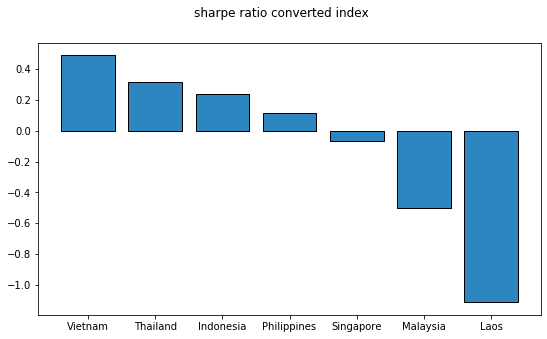

In [39]:
plt.figure('sharpe', figsize =(9,5))
plt.bar(dfsharpengurut['countries'], dfsharpengurut['sharpe ratio'], color= '#2E86C1', edgecolor='black', 
        linewidth=1)


plt.suptitle('sharpe ratio converted index')
plt.savefig('coninsharpebar.png')
# dfsharpengurut.to_html('sharpe.html')

In [40]:
negara = df.columns.tolist()[1:]
negara

['Indonesia',
 'Laos',
 'Malaysia',
 'Philippines',
 'Singapore',
 'Thailand',
 'Vietnam']

In [41]:
dfsharpesorted = dfsharpe.sort_values(['sharpe ratio'], ascending=False)
dfsharpesorted = dfsharpesorted.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfsharpesorted
dfsharpesorted = dfsharpesorted.set_index('countries')
dfsharpesorted

# dfsharpesorted.to_csv("sharperatio.csv")


,sharpe ratio
countries,
Vietnam,0.487874
Thailand,0.317330
Indonesia,0.239779
Philippines,0.115549
Singapore,-0.066347
Malaysia,-0.501831
Laos,-1.112991


In [42]:
# ##percentage return from the beginning of 2014 until the end of 2019.

persenreturnall = []

for i in result.columns.tolist():
    persenreturn = ((dfgab[i][len(dfgab[i])-1] - dfgab[i][0])/dfgab[i][0])*100
    persenreturnall.append(persenreturn)
persenreturnall

[27.06686630764664,
 -47.95202734693455,
 -30.214679978242252,
 14.368759228184894,
 -4.621388302711758,
 41.11785917076107,
 73.86147856990284]

In [43]:
dfpersenreturnall = pd.DataFrame({'countries':result.columns.tolist(), 'return converted index (2014 - 2019)': persenreturnall  })

dfpersenreturnall

,countries,return converted index (2014 - 2019)
0,Indonesia,27.066866
1,Laos,-47.952027
2,Malaysia,-30.214680
3,Philippines,14.368759
4,Singapore,-4.621388
5,Thailand,41.117859
6,Vietnam,73.861479


In [44]:
#sort returnall
dfpersenreturnalls = dfpersenreturnall.sort_values(['return converted index (2014 - 2019)'], ascending=False)
dfpersenreturnallssorted = dfpersenreturnalls.set_index(np.arange(1,len(dfpersenreturnalls)+1))
dfpersenreturnallssorted
dfpersenreturnallssorted = dfpersenreturnallssorted.set_index('countries')
dfpersenreturnallssorted


,return converted index (2014 - 2019)
countries,
Vietnam,73.861479
Thailand,41.117859
Indonesia,27.066866
Philippines,14.368759
Singapore,-4.621388
Malaysia,-30.214680
Laos,-47.952027


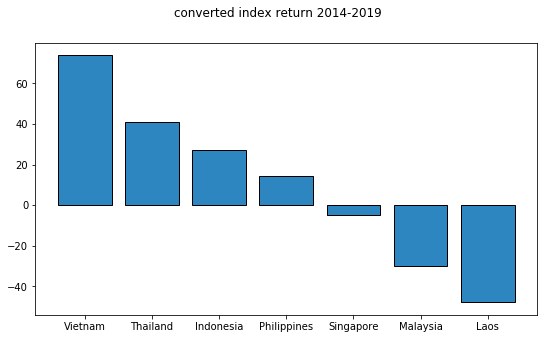

In [45]:
dfpersensorted = dfpersenreturnall.sort_values(['return converted index (2014 - 2019)'], ascending=False)
dfpersensorted = dfpersensorted.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfpersensorted

plt.figure('returnall', figsize =(9,5))
plt.bar(dfpersensorted['countries'], dfpersensorted['return converted index (2014 - 2019)'], color= '#2E86C1', edgecolor='black', 
        linewidth=1)

plt.suptitle('converted index return 2014-2019')
plt.savefig('conindexreturnall.png')

## Currency.

In [46]:
## return of USD to other countries

pengurangank1 = df2.loc[len(df2)-1,'Indonesia':'Vietnam'] - df2.loc[1314,'Indonesia':'Vietnam']
pengurangank1 
returnk2019 = pengurangank1 / df2.loc[1314,'Indonesia':'Vietnam']
returnk2019

Indonesia      -0.0363448
Laos            0.0385201
Malaysia      -0.00737606
Philippines     -0.030916
Singapore      -0.0129547
Thailand       -0.0719157
Vietnam        -0.0015083
dtype: object

In [47]:

first2018 = df['Indonesia'][df['Date']=='2018-01-02'].index[0]
end2018 = df['Indonesia'][df['Date']=='2018-12-30'].index[0]
first2018
pengurangank2 = df2.loc[end2018,'Indonesia':'Vietnam'] - df2.loc[first2018,'Indonesia':'Vietnam']
pengurangank2 
returnk2018 = pengurangank2 / df2.loc[first2018,'Indonesia':'Vietnam']
returnk2018

Indonesia       0.0769515
Laos            0.0304164
Malaysia        0.0328522
Philippines     0.0543275
Singapore       0.0279178
Thailand       0.00370142
Vietnam         0.0215859
dtype: object

In [48]:
## finding the index of the first year and the end year.
first2017 = df['Indonesia'][df['Date']=='2017-01-02'].index[0]
end2017 = df['Indonesia'][df['Date']=='2017-12-30'].index[0]
first2017
pengurangank2 = df2.loc[end2017,'Indonesia':'Vietnam'] - df2.loc[first2017,'Indonesia':'Vietnam']
pengurangank2 
returnk2017 = pengurangank2 / df2.loc[first2017,'Indonesia':'Vietnam']
returnk2017

Indonesia      0.00705271
Laos            0.0163055
Malaysia       -0.0982272
Philippines    0.00729618
Singapore      -0.0780421
Thailand       -0.0907821
Vietnam       -0.00307422
dtype: object

In [49]:
## finding the index of the first year and the end year.
first2016 = df['Indonesia'][df['Date']=='2016-01-02'].index[0]
end2016 = df['Indonesia'][df['Date']=='2016-12-30'].index[0]
first2016
pengurangank2 = df2.loc[end2016,'Indonesia':'Vietnam'] - df2.loc[first2016,'Indonesia':'Vietnam']
pengurangank2 
returnk2016 = pengurangank2 / df2.loc[first2016,'Indonesia':'Vietnam']
returnk2016

Indonesia      -0.0224964
Laos           0.00343618
Malaysia        0.0458256
Philippines     0.0569205
Singapore       0.0239038
Thailand      -0.00665188
Vietnam         0.0162456
dtype: object

In [50]:
## finding the index of the first year and the end year.
first2015 = df['Indonesia'][df['Date']=='2015-01-02'].index[0]
end2015 = df['Indonesia'][df['Date']=='2015-12-30'].index[0]
first2015
pengurangank2 = df2.loc[end2015,'Indonesia':'Vietnam'] - df2.loc[first2015,'Indonesia':'Vietnam']
pengurangank2 
returnk2015 = pengurangank2 / df2.loc[first2015,'Indonesia':'Vietnam']
returnk2015

Indonesia      0.0993219
Laos           0.0100323
Malaysia        0.219915
Philippines    0.0461847
Singapore      0.0625188
Thailand       0.0946602
Vietnam        0.0484792
dtype: object

In [51]:
# finding the index of the first year and the end year.
first2014 = df['Indonesia'][df['Date']=='2014-01-02'].index[0]
end2014 = df['Indonesia'][df['Date']=='2014-12-30'].index[0]
first2014
pengurangank2 = df2.loc[end2014,'Indonesia':'Vietnam'] - df2.loc[first2014,'Indonesia':'Vietnam']
pengurangank2 
returnk2014 = pengurangank2 / df2.loc[first2014,'Indonesia':'Vietnam']
returnk2014


Indonesia       0.0242798
Laos              0.00875
Malaysia        0.0645358
Philippines    0.00584664
Singapore       0.0426926
Thailand       -0.0030349
Vietnam         0.0151947
dtype: object

In [52]:
## return kurs US dollar to all countries in ASEAN
resultreturnkurs = pd.concat([returnk2014, returnk2015, returnk2016, returnk2017, returnk2018, returnk2019], axis=1, sort=False)
resultreturnkurs

,0,1,2,3,4,5
Indonesia,0.0242798,0.0993219,-0.0224964,0.00705271,0.0769515,-0.0363448
Laos,0.00875,0.0100323,0.00343618,0.0163055,0.0304164,0.0385201
Malaysia,0.0645358,0.219915,0.0458256,-0.0982272,0.0328522,-0.00737606
Philippines,0.00584664,0.0461847,0.0569205,0.00729618,0.0543275,-0.030916
Singapore,0.0426926,0.0625188,0.0239038,-0.0780421,0.0279178,-0.0129547
Thailand,-0.0030349,0.0946602,-0.00665188,-0.0907821,0.00370142,-0.0719157
Vietnam,0.0151947,0.0484792,0.0162456,-0.00307422,0.0215859,-0.0015083


In [53]:
resultreturnkurs = resultreturnkurs.T
resultreturnkurs

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.0242798,0.00875,0.0645358,0.00584664,0.0426926,-0.0030349,0.0151947
1,0.0993219,0.0100323,0.219915,0.0461847,0.0625188,0.0946602,0.0484792
2,-0.0224964,0.00343618,0.0458256,0.0569205,0.0239038,-0.00665188,0.0162456
3,0.00705271,0.0163055,-0.0982272,0.00729618,-0.0780421,-0.0907821,-0.00307422
4,0.0769515,0.0304164,0.0328522,0.0543275,0.0279178,0.00370142,0.0215859
5,-0.0363448,0.0385201,-0.00737606,-0.030916,-0.0129547,-0.0719157,-0.0015083


In [54]:
resultreturnkurs.mean(axis = 0)

Indonesia      0.024794
Laos           0.017910
Malaysia       0.042921
Philippines    0.023277
Singapore      0.011006
Thailand      -0.012337
Vietnam        0.016154
dtype: float64

In [55]:
## Calculating mean to be inputed to sharpe ratio formula
meanresultreturnk = resultreturnkurs.mean(axis = 0)

colmeanresultreturnk = meanresultreturnk.index
valuesmeanresultreturnk = meanresultreturnk.values

dfmeanresultreturnk = pd.DataFrame({'countries': colmeanresultreturnk, 'kurs mean periodic return': valuesmeanresultreturnk })

dfmeanresultreturnk


,countries,kurs mean periodic return
0,Indonesia,0.024794
1,Laos,0.017910
2,Malaysia,0.042921
3,Philippines,0.023277
4,Singapore,0.011006
5,Thailand,-0.012337
6,Vietnam,0.016154


In [56]:
#sort returnall
dfmeanresultreturnk = dfmeanresultreturnk.sort_values(['kurs mean periodic return'], ascending=False)
dfmeanresultreturnksorted = dfmeanresultreturnk.set_index(np.arange(1,len(dfpersenreturnalls)+1))
dfmeanresultreturnksorted
dfmeanresultreturnksorted = dfmeanresultreturnksorted.set_index('countries')
dfmeanresultreturnksorted


,kurs mean periodic return
countries,
Malaysia,0.042921
Indonesia,0.024794
Philippines,0.023277
Laos,0.017910
Vietnam,0.016154
Singapore,0.011006
Thailand,-0.012337


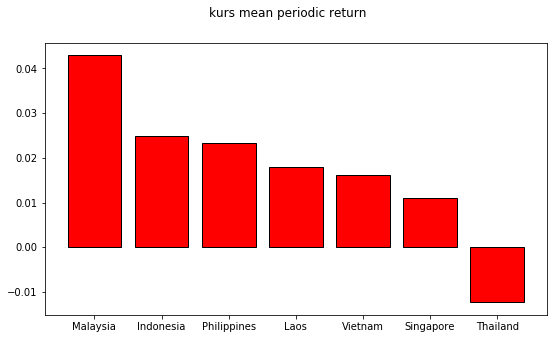

In [57]:
plt.figure('kurs mean periodic return', figsize =(9,5))
plt.bar(dfmeanresultreturnksorted.index, dfmeanresultreturnksorted['kurs mean periodic return'], color= 'red', edgecolor='black', 
        linewidth=1)

plt.suptitle('kurs mean periodic return')
plt.savefig('kursmeanperreturn.png')

In [58]:
## Risk Premium = Excess Return for kurs per year ##

kursriskpremium = resultreturnkurs - riskfree
kursriskpremium

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.00897984,-0.00655,0.0492358,-0.00945336,0.0273926,-0.0183349,-0.000105318
1,0.0840219,-0.00526774,0.204615,0.0308847,0.0472188,0.0793602,0.0331792
2,-0.0377964,-0.0118638,0.0305256,0.0416205,0.00860382,-0.0219519,0.000945648
3,-0.00824729,0.00100545,-0.113527,-0.00800382,-0.0933421,-0.106082,-0.0183742
4,0.0616515,0.0151164,0.0175522,0.0390275,0.0126178,-0.0115986,0.0062859
5,-0.0516448,0.0232201,-0.0226761,-0.046216,-0.0282547,-0.0872157,-0.0168083


In [59]:
stdkindo = np.std(kursriskpremium['Indonesia'])
stdkindo


0.049268246439005896

In [60]:
stdklaos = np.std(kursriskpremium['Laos'])
stdklaos

0.01251143583658815

In [61]:
stdkmalay = np.std(kursriskpremium['Malaysia'])
stdkmalay


0.09518086717581568

In [62]:
stdkphilip = np.std(kursriskpremium['Philippines'])
stdkphilip


0.0319292721499813

In [63]:
stdksing = np.std(kursriskpremium['Singapore'])
stdksing


0.04585055271893841

In [64]:
stdkthai = np.std(kursriskpremium['Thailand'])
stdkthai


0.05989955068987436

In [65]:
stdkviet = np.std(kursriskpremium['Vietnam'])
stdkviet



0.01711253167022929

In [66]:
dfstdkurs = pd.DataFrame({'countries': kursriskpremium.columns.tolist(), 'std kurs excess return': [stdkindo, stdlaos, stdkmalay, stdkphilip, stdksing, stdkthai, stdkviet]})

dfstdkurs

dfstdsort = dfstdkurs.sort_values(['std kurs excess return'], ascending=False)
dfstdsort = dfstdsort.set_index(np.arange(1,len(dfpersenreturnalls)+1))

dfstdsort


,countries,std kurs excess return
1,Laos,0.102707
2,Malaysia,0.095181
3,Thailand,0.059900
4,Indonesia,0.049268
5,Singapore,0.045851
6,Philippines,0.031929
7,Vietnam,0.017113


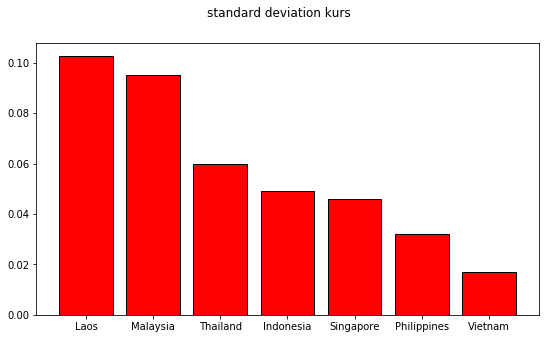

In [67]:
plt.figure('std kurs excess return', figsize =(9,5))
plt.bar(dfstdsort['countries'], dfstdsort['std kurs excess return'], color= 'red', edgecolor='black', 
        linewidth=1)

plt.suptitle('standard deviation kurs')
plt.savefig('stdkursexcessreturn.png')


In [68]:
dfstdkurssorted = dfstdkurs.sort_values(['std kurs excess return'], ascending=False)
dfstdkurssorted = dfstdkurssorted.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfstdkurssorted
dfstdkurssortedindex = dfstdkurssorted.set_index('countries')
dfstdkurssortedindex

,std kurs excess return
countries,
Laos,0.102707
Malaysia,0.095181
Thailand,0.059900
Indonesia,0.049268
Singapore,0.045851
Philippines,0.031929
Vietnam,0.017113


## Riskpremium or excess return = Mean Return Porto - Risfree

In [69]:



# sharperatioindonesia = (meanindo - riskfree) / stdindo
# sharperatioindonesia

riskpremiumkurs = (meanresultreturnk- riskfree) #/ dfstdkurssorted['std kurs excess return']

riskpremiumkurs

Indonesia      0.009494
Laos           0.002610
Malaysia       0.027621
Philippines    0.007977
Singapore     -0.004294
Thailand      -0.027637
Vietnam        0.000854
dtype: float64

In [70]:
negara = riskpremiumkurs.index #kursriskpremium.columns.tolist()
sharpekurs = []




for i in negara:
    sharperatiokurs = riskpremiumkurs[i] / dfstdkurssorted[dfstdkurssorted['countries'] == i]['std kurs excess return'].values[0]
    sharpekurs.append(sharperatiokurs)
# dfstdkurssorted[dfstdkurssorted['countries'] == 'Indonesia']['std kurs excess return']

dfsharpekurs = pd.DataFrame({'countries': negara, 'sharpekurs': sharpekurs})

dfsharpekurs
# meanresultreturnk['Indonesia']
# dfstdkurssorted[dfstdkurssorted['countries'] == 'Indonesia']['std kurs excess return'].values[0]





,countries,sharpekurs
0,Indonesia,0.192703
1,Laos,0.025413
2,Malaysia,0.290193
3,Philippines,0.249820
4,Singapore,-0.093651
5,Thailand,-0.461392
6,Vietnam,0.049894


In [71]:
dfsharpekurssorted = dfsharpekurs.sort_values(['sharpekurs'], ascending=False)
dfsharpekurssorted = dfsharpekurssorted.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfsharpekurssorted
dfsharpekurssorted = dfsharpekurssorted.set_index('countries')
dfsharpekurssorted


,sharpekurs
countries,
Malaysia,0.290193
Philippines,0.249820
Indonesia,0.192703
Vietnam,0.049894
Laos,0.025413
Singapore,-0.093651
Thailand,-0.461392


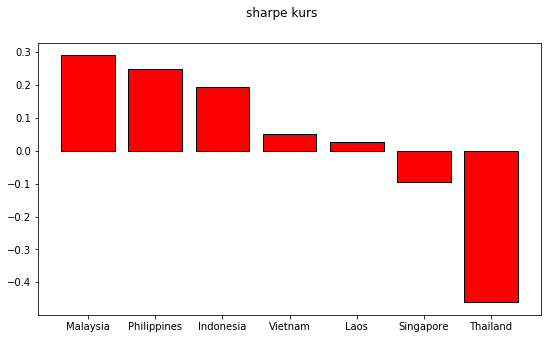

In [72]:
plt.figure('sharpe kurs', figsize =(9,5))
plt.bar(dfsharpekurssorted.index, dfsharpekurssorted['sharpekurs'], color= 'red', edgecolor='black', 
        linewidth=1)
plt.suptitle('sharpe kurs')
plt.savefig('sharpekurs.png')

In [73]:
# ##percentage return of kurs from the beginning of 2014 until the end of 2019.

persenreturnallk = []

for i in result.columns.tolist():
    persenreturnk = ((df2[i][len(df2[i])-1] - df2[i][0])/df2[i][0])*100
    persenreturnallk.append(persenreturnk)
persenreturnallk

[14.5679012345679,
 10.875,
 24.946727549467266,
 14.189341128850916,
 6.423611111111104,
 -9.135053110773903,
 10.018993352326685]

In [74]:
dfpersenreturnallk = pd.DataFrame({'countries':result.columns.tolist(), 'return kurs (2014 - 2019)': persenreturnallk  })

dfpersenreturnallk

dfpersenreturnallksorted = dfpersenreturnallk.sort_values(['return kurs (2014 - 2019)'], ascending=False)
dfpersenreturnallksorted = dfpersenreturnallksorted.set_index(np.arange(1,len(dfstdgabsorted)+1))
dfpersenreturnallksorted
dfpersenreturnallksorted = dfpersenreturnallksorted.set_index('countries')
dfpersenreturnallksorted


,return kurs (2014 - 2019)
countries,
Malaysia,24.946728
Indonesia,14.567901
Philippines,14.189341
Laos,10.875000
Vietnam,10.018993
Singapore,6.423611
Thailand,-9.135053


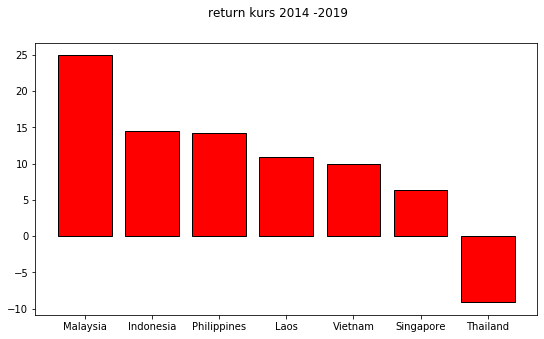

In [75]:
plt.figure('return kurs', figsize =(9,5))
plt.bar(dfpersenreturnallksorted.index, dfpersenreturnallksorted['return kurs (2014 - 2019)'], color= 'red', edgecolor='black', 
        linewidth=1)

plt.suptitle('return kurs 2014 -2019')
plt.savefig('returnkurs.png')



## Unconverted Index

In [76]:
## return per period(1 year) of unconverted index

penguranganui1 = df.loc[len(df2)-1,'Indonesia':'Vietnam'] - df.loc[1314,'Indonesia':'Vietnam']
penguranganui1 
returnui2019 = penguranganui1 / df.loc[1314,'Indonesia':'Vietnam']
returnui2019

Indonesia      0.0191491
Laos           -0.129524
Malaysia      -0.0314368
Philippines    0.0435374
Singapore      0.0604003
Thailand       0.0208176
Vietnam        0.0821755
dtype: object

In [77]:
## finding the index of the first year and the end year.
first2018 = df['Indonesia'][df['Date']=='2018-01-02'].index[0]
end2018 = df['Indonesia'][df['Date']=='2018-12-30'].index[0]
first2018
penguranganui2 = df.loc[end2018,'Indonesia':'Vietnam'] - df.loc[first2018,'Indonesia':'Vietnam']
penguranganui2 
returnui2018 = penguranganui2 / df.loc[first2018,'Indonesia':'Vietnam']
returnui2018

Indonesia     -0.0228324
Laos           -0.155178
Malaysia      -0.0508386
Philippines     -0.12764
Singapore      -0.109865
Thailand      -0.0794792
Vietnam        -0.103669
dtype: object

In [78]:
## finding the index of the first year and the end year.
first2017 = df['Indonesia'][df['Date']=='2017-01-02'].index[0]
end2017 = df['Indonesia'][df['Date']=='2017-12-30'].index[0]
first2017
penguranganui2 = df.loc[end2017,'Indonesia':'Vietnam'] - df.loc[first2017,'Indonesia':'Vietnam']
penguranganui2 
returnui2017 = penguranganui2 / df.loc[first2017,'Indonesia':'Vietnam']
returnui2017


Indonesia       0.196826
Laos          -0.0241092
Malaysia       0.0858667
Philippines     0.251114
Singapore       0.190762
Thailand        0.176506
Vietnam         0.497691
dtype: object

In [79]:
## finding the index of the first year and the end year.
first2016 = df['Indonesia'][df['Date']=='2016-01-02'].index[0]
end2016 = df['Indonesia'][df['Date']=='2016-12-30'].index[0]
first2017
penguranganui2 = df.loc[end2016,'Indonesia':'Vietnam'] - df.loc[first2016,'Indonesia':'Vietnam']
penguranganui2 
returnui2016 = penguranganui2 / df.loc[first2016,'Indonesia':'Vietnam']
returnui2016


Indonesia        0.153212
Laos            -0.135545
Malaysia       -0.0303637
Philippines    -0.0160297
Singapore     -0.00164616
Thailand         0.185963
Vietnam          0.147416
dtype: object

In [80]:
## finding the index of the first year and the end year.
first2015 = df['Indonesia'][df['Date']=='2015-01-02'].index[0]
end2015 = df['Indonesia'][df['Date']=='2015-12-30'].index[0]
first2015
penguranganui2 = df.loc[end2015,'Indonesia':'Vietnam'] - df.loc[first2015,'Indonesia':'Vietnam']
penguranganui2 
returnui2015 = penguranganui2 / df.loc[first2015,'Indonesia':'Vietnam']
returnui2015


Indonesia      -0.123935
Laos           -0.170104
Malaysia      -0.0340204
Philippines   -0.0385156
Singapore      -0.143915
Thailand       -0.187271
Vietnam        0.0619834
dtype: object

In [81]:
## finding the index of the first year and the end year.
first2014 = df['Indonesia'][df['Date']=='2014-01-02'].index[0]
end2014 = df['Indonesia'][df['Date']=='2014-12-30'].index[0]
first2015
penguranganui2 = df.loc[end2014,'Indonesia':'Vietnam'] - df.loc[first2014,'Indonesia':'Vietnam']
penguranganui2 
returnui2014 = penguranganui2 / df.loc[first2014,'Indonesia':'Vietnam']
returnui2014


Indonesia        0.20791
Laos            0.114139
Malaysia      -0.0464772
Philippines     0.208265
Singapore       0.060309
Thailand        0.201274
Vietnam        0.0655289
dtype: object

In [82]:
## return uncoverted index in ASEAN
resultreturnui = pd.concat([returnui2014, returnui2015, returnui2016, returnui2017, returnui2018, returnui2019], axis=1, sort=False)
resultreturnui


,0,1,2,3,4,5
Indonesia,0.20791,-0.123935,0.153212,0.196826,-0.0228324,0.0191491
Laos,0.114139,-0.170104,-0.135545,-0.0241092,-0.155178,-0.129524
Malaysia,-0.0464772,-0.0340204,-0.0303637,0.0858667,-0.0508386,-0.0314368
Philippines,0.208265,-0.0385156,-0.0160297,0.251114,-0.12764,0.0435374
Singapore,0.060309,-0.143915,-0.00164616,0.190762,-0.109865,0.0604003
Thailand,0.201274,-0.187271,0.185963,0.176506,-0.0794792,0.0208176
Vietnam,0.0655289,0.0619834,0.147416,0.497691,-0.103669,0.0821755


In [83]:
resultreturnui = resultreturnui.T
resultreturnui

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.20791,0.114139,-0.0464772,0.208265,0.060309,0.201274,0.0655289
1,-0.123935,-0.170104,-0.0340204,-0.0385156,-0.143915,-0.187271,0.0619834
2,0.153212,-0.135545,-0.0303637,-0.0160297,-0.00164616,0.185963,0.147416
3,0.196826,-0.0241092,0.0858667,0.251114,0.190762,0.176506,0.497691
4,-0.0228324,-0.155178,-0.0508386,-0.12764,-0.109865,-0.0794792,-0.103669
5,0.0191491,-0.129524,-0.0314368,0.0435374,0.0604003,0.0208176,0.0821755


In [84]:
## riskpremium = excess return

riskpremiumui = resultreturnui - riskfree
riskpremiumui

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.19261,0.0988387,-0.0617772,0.192965,0.045009,0.185974,0.0502289
1,-0.139235,-0.185404,-0.0493204,-0.0538156,-0.159215,-0.202571,0.0466834
2,0.137912,-0.150845,-0.0456637,-0.0313297,-0.0169462,0.170663,0.132116
3,0.181526,-0.0394092,0.0705667,0.235814,0.175462,0.161206,0.482391
4,-0.0381324,-0.170478,-0.0661386,-0.14294,-0.125165,-0.0947792,-0.118969
5,0.00384911,-0.144824,-0.0467368,0.0282374,0.0451003,0.00551761,0.0668755


In [85]:
# resultreturnkurs.mean(axis = 0)

In [86]:
## Calculating mean to be inputed to sharpe ratio formula
meanresultreturnui = resultreturnui.mean(axis = 0)

colmeanresultreturnui = meanresultreturnui.index
valuesmeanresultreturnui = meanresultreturnui.values

dfmeanresultreturnui = pd.DataFrame({'countries': colmeanresultreturnui, 'unconverted index mean periodic return': valuesmeanresultreturnui })

dfmeanresultreturnui


,countries,unconverted index mean periodic return
0,Indonesia,0.071722
1,Laos,-0.083387
2,Malaysia,-0.017878
3,Philippines,0.053455
4,Singapore,0.009341
5,Thailand,0.052968
6,Vietnam,0.125188


In [87]:
dfmeanresultreturnui = dfmeanresultreturnui.sort_values(['unconverted index mean periodic return'], ascending=False)
dfmeanresultreturnui = dfmeanresultreturnui.set_index(np.arange(1,len(dfmeanresultreturnui)+1))
dfmeanresultreturnui
dfmeanresultreturnui = dfmeanresultreturnui.set_index('countries')
dfmeanresultreturnui


,unconverted index mean periodic return
countries,
Vietnam,0.125188
Indonesia,0.071722
Philippines,0.053455
Thailand,0.052968
Singapore,0.009341
Malaysia,-0.017878
Laos,-0.083387


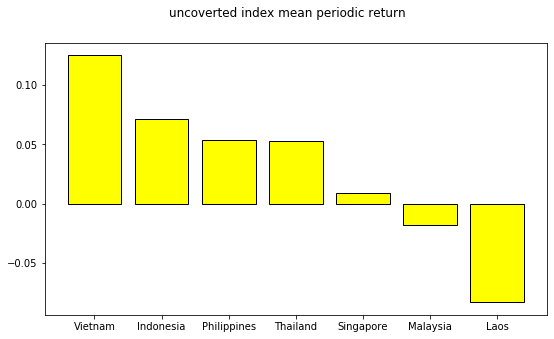

In [133]:
plt.figure('uncon index mean periodic return', figsize =(9,5))
plt.bar(dfmeanresultreturnui.index, dfmeanresultreturnui['unconverted index mean periodic return'], color= 'yellow', edgecolor='black', 
        linewidth=1)

plt.suptitle('uncoverted index mean periodic return')
plt.savefig('unconreturnperiodic1.png')

In [89]:
negara = resultreturnui.columns.tolist()
stduiall = []
for i in negara:
    stdui = np.std(resultreturnui[i])
    stduiall.append(stdui)
stduiall

[0.12303443985826559,
 0.10004430898288924,
 0.04702410865035687,
 0.1349170816625937,
 0.11249945767364063,
 0.14789334557132766,
 0.18304469789916458]

In [90]:
negara = resultreturnui.columns.tolist()
stduiall = []
for i in negara:
    stdui = np.std(resultreturnui[i])
    stduiall.append(stdui)
stduiall


[0.12303443985826559,
 0.10004430898288924,
 0.04702410865035687,
 0.1349170816625937,
 0.11249945767364063,
 0.14789334557132766,
 0.18304469789916458]

In [91]:
dfstduiall = pd.DataFrame({'countries': negara, 'std ui riskpremium': stduiall})
dfstduiall

,countries,std ui riskpremium
0,Indonesia,0.123034
1,Laos,0.100044
2,Malaysia,0.047024
3,Philippines,0.134917
4,Singapore,0.112499
5,Thailand,0.147893
6,Vietnam,0.183045


In [92]:
dfstduiallsorted = dfstduiall.sort_values(['std ui riskpremium'], ascending=False)
dfstduiallsorted = dfstduiallsorted.set_index(np.arange(1,len(dfstduiallsorted)+1))
dfstduiallsorted
dfstduiallsortedindex = dfstduiallsorted.set_index('countries')
dfstduiallsortedindex


,std ui riskpremium
countries,
Vietnam,0.183045
Thailand,0.147893
Philippines,0.134917
Indonesia,0.123034
Singapore,0.112499
Laos,0.100044
Malaysia,0.047024


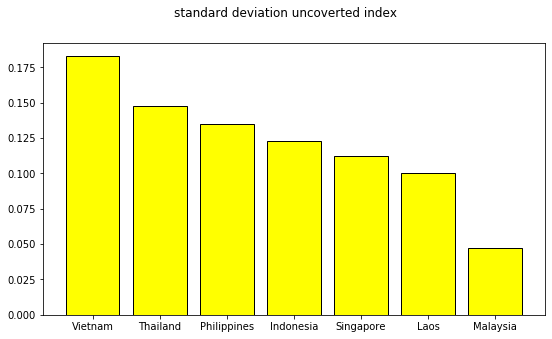

In [121]:
plt.figure('stduiriskpremium', figsize =(9,5))
plt.bar(dfstduiallsortedindex.index, dfstduiallsortedindex['std ui riskpremium'], color= 'yellow', edgecolor='black', 
        linewidth=1)

plt.suptitle('standard deviation uncoverted index')
plt.savefig('unconstd1.png')


## Riskpremium or excess return = Mean Return Porto - Risfree

In [109]:
excessmeanui = (meanresultreturnui- riskfree) #/ dfstdkurssorted['std kurs excess return']

excessmeanui

Indonesia      0.056422
Laos          -0.098687
Malaysia      -0.033178
Philippines    0.038155
Singapore     -0.005959
Thailand       0.037668
Vietnam        0.109888
dtype: float64

In [110]:
negara = resultreturnui.columns.tolist()
sharpeui = []




for i in negara:
    sharperatiouiappend = excessmeanui[i] / dfstduiallsorted[dfstduiallsorted['countries'] == i]['std ui riskpremium'].values[0]
    sharpeui.append(sharperatiouiappend)
sharpeui

# dfstduiallsorted[dfstduiallsorted['countries'] == 'Indonesia']['std ui riskpremium'].values[0]



[0.45858452372345865,
 -0.9864322088738586,
 -0.7055601799317456,
 0.28280360131253973,
 -0.05297081162929088,
 0.25470014696275606,
 0.6003326350733316]

In [111]:
dfsharpeui = pd.DataFrame({'countries': negara, 'sharpe ui': sharpeui})

dfsharpeui

,countries,sharpe ui
0,Indonesia,0.458585
1,Laos,-0.986432
2,Malaysia,-0.705560
3,Philippines,0.282804
4,Singapore,-0.052971
5,Thailand,0.254700
6,Vietnam,0.600333


In [112]:
dfsharpeuisorted = dfsharpeui.sort_values(['sharpe ui'], ascending=False)
dfsharpeuisorted = dfsharpeuisorted.set_index(np.arange(1,len(dfsharpeuisorted)+1))
dfsharpeuisorted



,countries,sharpe ui
1,Vietnam,0.600333
2,Indonesia,0.458585
3,Philippines,0.282804
4,Thailand,0.254700
5,Singapore,-0.052971
6,Malaysia,-0.705560
7,Laos,-0.986432


In [113]:
dfsharpeuisorted = dfsharpeuisorted.set_index('countries')
dfsharpeuisorted

,sharpe ui
countries,
Vietnam,0.600333
Indonesia,0.458585
Philippines,0.282804
Thailand,0.254700
Singapore,-0.052971
Malaysia,-0.705560
Laos,-0.986432


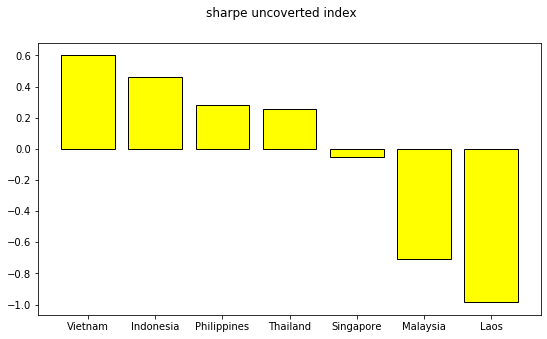

In [122]:
plt.figure('sharpeui', figsize =(9,5))
plt.bar(dfsharpeuisorted.index, dfsharpeuisorted['sharpe ui'], color= 'yellow', edgecolor='black', 
        linewidth=1)
plt.suptitle('sharpe uncoverted index')
plt.savefig('unconsharpe1.png')

In [123]:
persenreturnallui = []

for i in result.columns.tolist():
    persenreturnui = ((df[i][len(df[i])-1] - df[i][0])/df[i][0])*100
    persenreturnallui.append(persenreturnui)
persenreturnallui

[45.57784189320505,
 -42.29181032091368,
 -12.805526322890524,
 30.59693261990622,
 1.5053627958987592,
 28.226667786724914,
 91.2806485500783]

In [124]:
dfpersenreturnallui = pd.DataFrame({'countries':result.columns.tolist(), 'return uncoverted index (2014 - 2019)': persenreturnallui  })

dfpersenreturnallui



,countries,return uncoverted index (2014 - 2019)
0,Indonesia,45.577842
1,Laos,-42.291810
2,Malaysia,-12.805526
3,Philippines,30.596933
4,Singapore,1.505363
5,Thailand,28.226668
6,Vietnam,91.280649


In [125]:

dfpersenreturnallui = dfpersenreturnallui.sort_values(['return uncoverted index (2014 - 2019)'], ascending=False)
dfpersenreturnalluisorted = dfpersenreturnallui.set_index(np.arange(1,len(dfpersenreturnalls)+1))
dfpersenreturnalluisorted
dfpersenreturnalluisorted = dfpersenreturnalluisorted.set_index('countries')
dfpersenreturnalluisorted

,return uncoverted index (2014 - 2019)
countries,
Vietnam,91.280649
Indonesia,45.577842
Philippines,30.596933
Thailand,28.226668
Singapore,1.505363
Malaysia,-12.805526
Laos,-42.291810


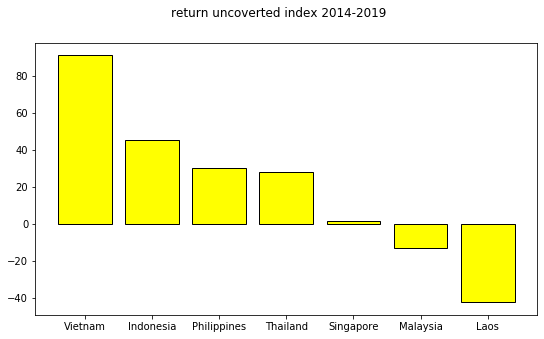

In [128]:
plt.figure('return ui 2014-2019', figsize =(9,5))
plt.bar(dfpersenreturnalluisorted.index, dfpersenreturnalluisorted['return uncoverted index (2014 - 2019)'], color= 'yellow', edgecolor='black', 
        linewidth=1)
plt.suptitle('return uncoverted index 2014-2019')
plt.savefig('unconreturnall.png')



In [129]:
# dfmeanresultreturngabsorted, dfstdgabsorted, dfsharpesorted, dfpersenreturnallssorted

# dfmeanresultreturnksorted, dfstdkurssorted, dfsharpekurssorted, dfpersenreturnallksorted

# dfmeanresultreturnuidfmeanresultreturnui, dfstduiallsorted, dfsharpeuisorted, dfpersenreturnalluisorted

In [130]:
dfmeanresultreturngabsorted, dfstdgabsorted, dfsharpesorted, dfpersenreturnallssorted, dfmeanresultreturnksorted, dfstdkurssorted, dfsharpekurssorted, dfpersenreturnallksorted, dfmeanresultreturnui, dfmeanresultreturnui, dfstduiallsorted, dfsharpeuisorted, dfpersenreturnalluisorted




(             converted index mean periodic return
 countries                                        
 Vietnam                                  0.109174
 Thailand                                 0.075384
 Indonesia                                0.051553
 Philippines                              0.032925
 Singapore                                0.004915
 Malaysia                                -0.047736
 Laos                                    -0.099012,
              standard deviation
 countries                      
 Vietnam                0.192415
 Thailand               0.189343
 Singapore              0.156528
 Philippines            0.152530
 Indonesia              0.151196
 Malaysia               0.125611
 Laos                   0.102707,
              sharpe ratio
 countries                
 Vietnam          0.487874
 Thailand         0.317330
 Indonesia        0.239779
 Philippines      0.115549
 Singapore       -0.066347
 Malaysia        -0.501831
 Laos            -1.112991

In [135]:
concatall = pd.concat([dfmeanresultreturngabsorted, dfstdgabsorted, dfsharpesorted, dfpersenreturnallssorted, dfmeanresultreturnksorted, dfstdkurssortedindex, dfsharpekurssorted, dfpersenreturnallksorted, dfmeanresultreturnui, dfmeanresultreturnui, dfstduiallsortedindex, dfsharpeuisorted, dfpersenreturnalluisorted], axis=1, sort=False)


concatall

# dfstdkurssortedindex
# dfstduiallsortedindex

,converted index mean periodic return,standard deviation,sharpe ratio,return converted index (2014 - 2019),kurs mean periodic return,std kurs excess return,sharpekurs,return kurs (2014 - 2019),unconverted index mean periodic return,unconverted index mean periodic return,std ui riskpremium,sharpe ui,return uncoverted index (2014 - 2019)
Vietnam,0.109174,0.192415,0.487874,73.861479,0.016154,0.017113,0.049894,10.018993,0.125188,0.125188,0.183045,0.600333,91.280649
Thailand,0.075384,0.189343,0.317330,41.117859,-0.012337,0.059900,-0.461392,-9.135053,0.052968,0.052968,0.147893,0.254700,28.226668
Indonesia,0.051553,0.151196,0.239779,27.066866,0.024794,0.049268,0.192703,14.567901,0.071722,0.071722,0.123034,0.458585,45.577842
Philippines,0.032925,0.152530,0.115549,14.368759,0.023277,0.031929,0.249820,14.189341,0.053455,0.053455,0.134917,0.282804,30.596933
Singapore,0.004915,0.156528,-0.066347,-4.621388,0.011006,0.045851,-0.093651,6.423611,0.009341,0.009341,0.112499,-0.052971,1.505363
Malaysia,-0.047736,0.125611,-0.501831,-30.214680,0.042921,0.095181,0.290193,24.946728,-0.017878,-0.017878,0.047024,-0.705560,-12.805526
Laos,-0.099012,0.102707,-1.112991,-47.952027,0.017910,0.102707,0.025413,10.875000,-0.083387,-0.083387,0.100044,-0.986432,-42.291810


In [132]:
concatall.to_html('concatall.html')

In [145]:
dfconverted = pd.concat([dfmeanresultreturngabsorted, dfstdgabsorted, dfsharpesorted, dfpersenreturnallssorted], axis=1, sort=False)
dfconverted.to_html('converted.html')
dfconverted

,converted index mean periodic return,standard deviation,sharpe ratio,return converted index (2014 - 2019)
Vietnam,0.109174,0.192415,0.487874,73.861479
Thailand,0.075384,0.189343,0.317330,41.117859
Indonesia,0.051553,0.151196,0.239779,27.066866
Philippines,0.032925,0.152530,0.115549,14.368759
Singapore,0.004915,0.156528,-0.066347,-4.621388
Malaysia,-0.047736,0.125611,-0.501831,-30.214680
Laos,-0.099012,0.102707,-1.112991,-47.952027


In [144]:
dfkurscal = pd.concat([dfmeanresultreturnksorted, dfstdkurssortedindex, dfsharpekurssorted, dfpersenreturnallksorted], axis=1, sort=False)

dfkurscal.to_html('kurscal.html')
dfkurscal

,kurs mean periodic return,std kurs excess return,sharpekurs,return kurs (2014 - 2019)
Malaysia,0.042921,0.095181,0.290193,24.946728
Indonesia,0.024794,0.049268,0.192703,14.567901
Philippines,0.023277,0.031929,0.249820,14.189341
Laos,0.017910,0.102707,0.025413,10.875000
Vietnam,0.016154,0.017113,0.049894,10.018993
Singapore,0.011006,0.045851,-0.093651,6.423611
Thailand,-0.012337,0.059900,-0.461392,-9.135053


In [143]:
dfuical =pd.concat([dfmeanresultreturnui, dfmeanresultreturnui, dfstduiallsortedindex, dfsharpeuisorted, dfpersenreturnalluisorted], axis=1, sort=False)

dfuical.to_html('unconcal.html')

dfuical

,unconverted index mean periodic return,unconverted index mean periodic return,std ui riskpremium,sharpe ui,return uncoverted index (2014 - 2019)
Vietnam,0.125188,0.125188,0.183045,0.600333,91.280649
Indonesia,0.071722,0.071722,0.123034,0.458585,45.577842
Philippines,0.053455,0.053455,0.134917,0.282804,30.596933
Thailand,0.052968,0.052968,0.147893,0.254700,28.226668
Singapore,0.009341,0.009341,0.112499,-0.052971,1.505363
Malaysia,-0.017878,-0.017878,0.047024,-0.705560,-12.805526
Laos,-0.083387,-0.083387,0.100044,-0.986432,-42.291810
